# *DATA SCIENCE / SECTION 1 / PROJECT*



# 🏆 프로젝트 목표


> 다음 분기 설계할 게임 분석

#  🕹️ Data Description

*   `Name` : 게임 이름
*   `Platform` : 게임이 지원되는 플랫폼의 이름
*   `Year` : 게임 출시 연도 (1980-2020년)
*   `Genre` : 게임의 장르
*   `Publisher` : 게임을 제작한 회사
*   `NA_Sales` : 북미지역 출고량 (단위 :백만)
*   `EU_Sales` : 유럽지역에서의 출고량 (단위 :백만)
*   `JP_Sales` : 일본지역에서의 출고량 (단위 :백만)
*   `Other_Sales `: 기타지역 출고량 (단위 :백만)

#  데이터 탐색




## **1. Gathering Data**

In [835]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('mode.chained_assignment',  None) #warning sign 무시하기

!sudo apt-get install -y fonts-nanum  #한글폰트 다운
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (24.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [836]:
#데이터셋 불러오기
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


## **2. 데이터 탐색 및 정제**

In [837]:
#불필요한 행 제거
df = df.iloc[:,1:]
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [838]:
#결측치, 데이터타입 확인
#year, genre, publisher에 결측치 존재하고, 출고량과 year의 데이터타입 변경 필요.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [839]:
#분석하기 쉽게 연도,이름순으로 정렬.
df.sort_values(by=['Year','Name'],ascending=True,inplace=True)

In [840]:
#'Name'이 고유한지 확인하기 위해 이름의 중복치에 대해 이름과 연도를 기준으로 정렬
#같은 이름이어도 여러 플랫폼이 존재함.

df[df.duplicated(['Name'],keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2249,SplashDown,PS2,1.0,Racing,Atari,0.34,0.27,0,0.09
8144,ESPN NFL Primetime 2002,XB,2.0,Sports,Konami Digital Entertainment,0.01,0,0,0
11163,Momotarou Dentetsu 11,GC,2.0,Misc,Hudson Soft,0,0,0.07,0
15612,Rally Fusion: Race of Champions,PS2,2.0,Racing,Activision,0.06,0.05,0,0.02
8765,Disney's Aladdin,GBA,3.0,Platform,Capcom,0.02,0.01,0,0
...,...,...,...,...,...,...,...,...,...
6118,Wheel of Fortune,PS2,NaN,Misc,Unknown,0.47,0.36,0,0.12
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
15776,Without Warning,XB,NaN,Shooter,Capcom,0.01,0,0,0


In [841]:
df[df.duplicated(['Name','Platform'],keep=False)]

# 같은 이름의 게임이어도 출시 년도가 다를 수 있음. (예를들면 재출시 하는 경우)
#그에 따라 'Year'은 대체가 불가능 하다고 판단됨.
#출고량에 단위가 'K'인것 발견

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2673,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,20K,0.23,0,0.05
12529,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1,0.17,0.02,0.1
15705,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.07,0.04,0.66
7346,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0,0.22
8717,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0,0.01,0,0
1318,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.8,0.01,0.15
13808,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0,0.06,0,0.02
8651,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0,0.48,0,0
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [842]:
# Year 결측치들 제거
df.dropna(subset=['Year'],inplace=True)

In [843]:
#'Year'가 1900미만인 데이터 삭제.
df= df[df['Year'] > 1900]

In [844]:
#Genre의 결측치와 같은 게임이름의 데이터를 가진 다른 열이 있는지 확인
missing_G = df[df['Genre'].isnull()]
yes_G = df.copy()                       #원래 데이터를 복사해서 사용
yes_G = yes_G.dropna(subset=['Genre']) # 'Publisher'가 nan값인 행들만 제거!

have_G =[]
for data in yes_G['Name']:
    if data in missing_G['Name'].unique():
        have_G.append(data)

len(list(set(have_G)))  #20개의 데이터 대체 가능!

20

In [845]:
missing_G['Genre']  = missing_G['Name'].map(lambda x : yes_G.query('Name == "'+x+'"').Genre.iloc[0] if len(yes_G.query('Name == "'+x+'"')) > 0 else np.NaN)

In [846]:
missing_G.isnull().sum() #20개 대체완료.

Name            0
Platform        0
Year            0
Genre          30
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [847]:
#df에 해당 데이터 덮어씌우기

df.update(missing_G,overwrite=True)

In [848]:
#같은방법으로 'Publisher'확인 
missing_P = df[df['Publisher'].isnull()]
yes_P = df.copy()                       #원래 데이터를 복사해서 사용
yes_P = yes_P.dropna(subset=['Publisher']) # 'Publisher'가 nan값인 행들만 제거!

#기존데이터의 'Name'과 'Publisher'결측치의 'Name'이 같은 데이터가 있는지 확인.
have_P = []

for data in yes_P['Name']:           
    if data in missing_P['Name'].unique():
        have_P.append(data)
have_P                                #1개의 데이터 대체가능.

['Bound By Flame']

In [849]:
missing_P['Publisher']  = missing_P['Name'].map(lambda x : yes_P.query('Name == "'+x+'"').Publisher.iloc[0] if len(yes_P.query('Name == "'+x+'"')) > 0 else np.NaN)

In [850]:
df.update(missing_P,overwrite=True) #덮어쓰기

In [851]:
df.isnull().sum() 

Name            0
Platform        0
Year            0
Genre          30
Publisher      35
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [852]:
#결측치 삭제
df.dropna(inplace=True)

In [853]:
#'Name','Platform','Year' 이 같은 항목 삭제
df.drop_duplicates(['Name','Platform','Year'],keep=False,inplace=True)

In [854]:
df.reset_index(drop=True,inplace=True) #인덱스 재정렬.

In [855]:
#출고량에 숫자이외의 문자가 들어있는 항목 전부 뽑아내기.
import re                

def has_errors(inputString):
  return bool(re.search('[a-zA-Z]+', inputString))

error_condition = df.NA_Sales.apply(has_errors)|df.EU_Sales.apply(has_errors)|df.JP_Sales.apply(has_errors)|df.Other_Sales.apply(has_errors)
error= df[error_condition]

In [856]:
#출고량에 'K'나 'M'등 문자로 이루어진 데이터 변환해줌.
#'M'은 원래 단위와 같으니 지워주고
# 'K'인 데이터는 *0.001 을 해준다.

Sales= ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

for i in Sales:
  df[i] =df[i].replace({"K":"*0.001", "M":""}, regex=True).map(pd.eval)


In [857]:
#year 의 데이터 타입 정수로 바꿔주기.
df['Year']=df['Year'].astype(np.int64)

#Feature Engineering

## **1. 의미있는 Feature 추가**

In [858]:
# 전 세계 통합 판매량을 알아보기 위해 Feature 를 추가한다.
df['Global_Sales']=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

#지역별 선호 게임장르

## **1. 가설 설정 및 검정**

H0 : 지역이 달라도 선호하는 게임의 장르는 같다.

H1 : 적어도 한 지역은 선호하는 게임의 장르가 다르다.

In [859]:
#라이브러리 불러오기
import scipy.stats as stats

In [860]:
#가설검정에 앞서 지역별 게임판매량의 평균을 알아보자.

Sales_means = df.groupby('Genre',as_index=False)[Sales].mean()
Sales_means

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.265161,0.159087,0.048214,0.056950
1,Adventure,0.080039,0.050032,0.040948,0.013144
2,Fighting,0.265663,0.120265,0.104096,0.043542
3,Misc,0.235963,0.124234,0.062028,0.043397
4,Platform,0.511028,0.230266,0.149215,0.059076
5,Puzzle,0.216846,0.090305,0.100699,0.022204
6,Racing,0.292995,0.193894,0.045726,0.062987
7,Role-Playing,0.210617,0.120933,0.230624,0.037524
8,Shooter,0.450055,0.242110,0.029402,0.079417
9,Simulation,0.215012,0.133860,0.075368,0.037114


In [861]:
NA_Sales = Sales_means['NA_Sales']
EU_Sales = Sales_means['EU_Sales']
JP_Sales = Sales_means['JP_Sales']
Other_Sales = Sales_means['Other_Sales']



F_statistic, pVal = stats.f_oneway(NA_Sales,EU_Sales,JP_Sales,Other_Sales)

print('분석 결과 : F={0:.1f}, p={1:.8f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 귀무가설이 기각, 적어도 한지역은 선호하는 게임이 통계적으로 유의미하게 다릅니다.')

분석 결과 : F=19.3, p=0.00000004
P-value 값이 충분히 작음으로 인해 귀무가설이 기각, 적어도 한지역은 선호하는 게임이 통계적으로 유의미하게 다릅니다.


## **2. 사후 분석 및 시각화**

In [862]:
#그래프를 선호도순으로 나열하기 위해 내림차순으로 정렬한다.
NA_Sales = Sales_means.sort_values(by='NA_Sales',ascending = False)
EU_Sales = Sales_means.sort_values(by='EU_Sales',ascending = False)
JP_Sales = Sales_means.sort_values(by='JP_Sales',ascending = False)
Other_Sales = Sales_means.sort_values(by='Other_Sales',ascending = False)


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


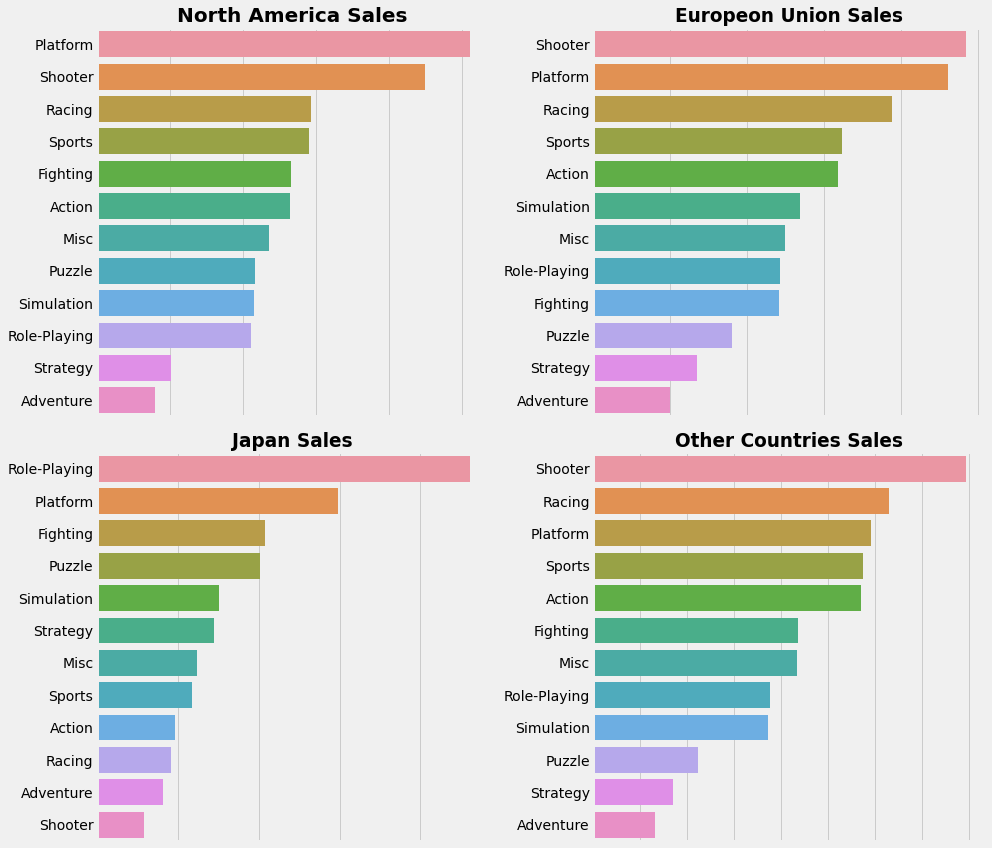

In [863]:
# 그렇다면 각 지역별로 장르선호도가 어떻게 다를까

plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(14,12))
plt.subplot(221)
ax1 = sns.barplot(x=NA_Sales['NA_Sales'], y= NA_Sales['Genre'])
ax = plt.gca()
plt.title('North America Sales',fontsize=20, fontweight='semibold')
ax1.set(xlabel=None , ylabel=None)
plt.tick_params(axis='x', which='both',bottom=False, top=False,labelbottom=False)

plt.subplot(222)
ax2 = sns.barplot(x=EU_Sales['EU_Sales'], y= EU_Sales['Genre'])
plt.title('Europeon Union Sales',fontsize=18.5, fontweight='semibold')
ax2.set(xlabel=None , ylabel=None)
plt.tick_params(axis='x', which='both',bottom=False, top=False,labelbottom=False)

plt.subplot(223)
ax3 = sns.barplot(x=JP_Sales['JP_Sales'], y= JP_Sales['Genre'])
plt.title('Japan Sales',fontsize=18.5, fontweight='semibold')
ax3.set(xlabel=None , ylabel=None)
plt.tick_params(axis='x', which='both',bottom=False, top=False,labelbottom=False)

plt.subplot(224)
ax4 = sns.barplot(x=Other_Sales['Other_Sales'], y= Other_Sales['Genre'])
plt.title('Other Countries Sales',fontsize=18.5, fontweight='semibold')
ax4.set(xlabel=None , ylabel=None)
plt.tick_params(axis='x', which='both',bottom=False, top=False,labelbottom=False)

fig.tight_layout()
plt.show;

미국과 유럽, 기타국가들은 슈팅게임를 아주 선호하는 것으로 보이나 일본의 경우는 슈팅게임을 제일 선호하지 않는다. 

다른나라들은 모두 비슷한 장르를 선호하는 것으로 보이나 일본의 경우는 다른 양상을 띈다. 

#연도별 게임 트랜드

제일 먼저 연도별 게임의 출시 현황을 살펴 본 다음,
연도별 선호 장르추이가 어떻게 변하는지 살펴보자

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

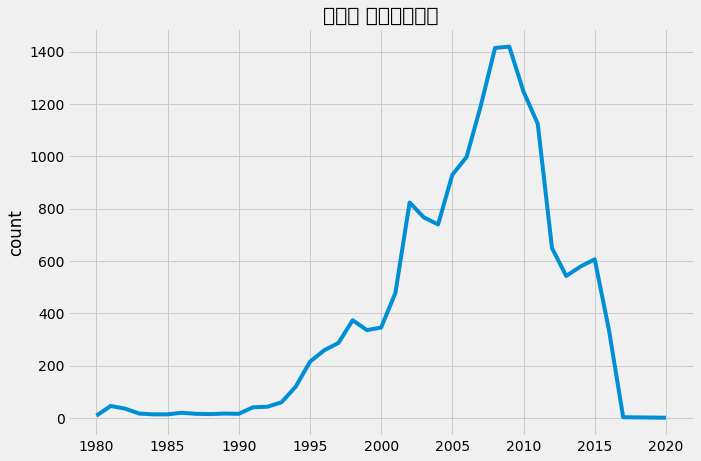

In [864]:
# 연도별 게임 출시 현황을 살펴 본 결과 2005~2011년 사이에 가장 많은 게임이 출시되었다.

release_by_year =df.groupby('Year',as_index=False)[['Name']].count()

#시각화로 살펴보자
from matplotlib import rc

plt.rc('font', family='NanumBarunGothic') 

fig = plt.figure(figsize=(10,7))
ax = sns.lineplot(x=release_by_year.Year ,y=release_by_year.Name)
ax.set(xlabel=None , ylabel='count')
plt.title('연도별 게임출시현황')
plt.show;

In [865]:
by_year = df.groupby(['Year','Genre'],as_index=False)['Global_Sales'].mean()

In [866]:
by_year

,Year,Genre,Global_Sales
0,1980,Action,0.340000
1,1980,Fighting,0.770000
2,1980,Misc,0.675000
3,1980,Shooter,3.535000
4,1980,Sports,0.500000
...,...,...,...
384,2016,Sports,0.390811
385,2016,Strategy,0.052000
386,2017,Action,0.010000
387,2017,Role-Playing,0.020000


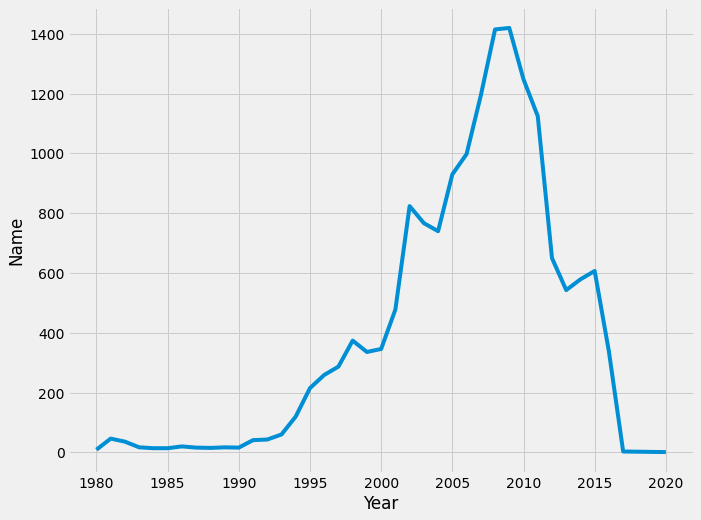

In [867]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(10,8))
ax = sns.lineplot(x=release_by_year.Year ,y=release_by_year.Name)